In [25]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
df_bcom_raw = pd.read_excel('BCOM Index (OHLC).xlsx', skiprows=[0,1,2,3,4,5], parse_dates=['Date'], index_col=0)
df_spx_raw = pd.read_excel('SPX Index (OHLC).xlsx', skiprows=[0,1,2,3,4,5], parse_dates=['Date'], index_col=0)


In [27]:
df_bcom_close = df_bcom_raw.PX_LAST
df_spx_close = df_spx_raw.PX_LAST

In [28]:
# index从小到大排列

df_bcom_close = df_bcom_close.sort_index(ascending=True)
df_spx_close = df_spx_close.sort_index(ascending=True)

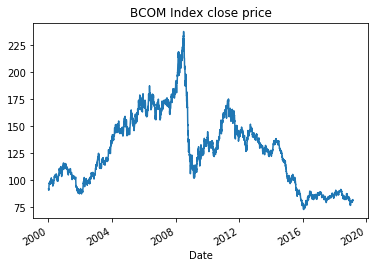

In [30]:
df_bcom_close.plot(title='BCOM Index close price')

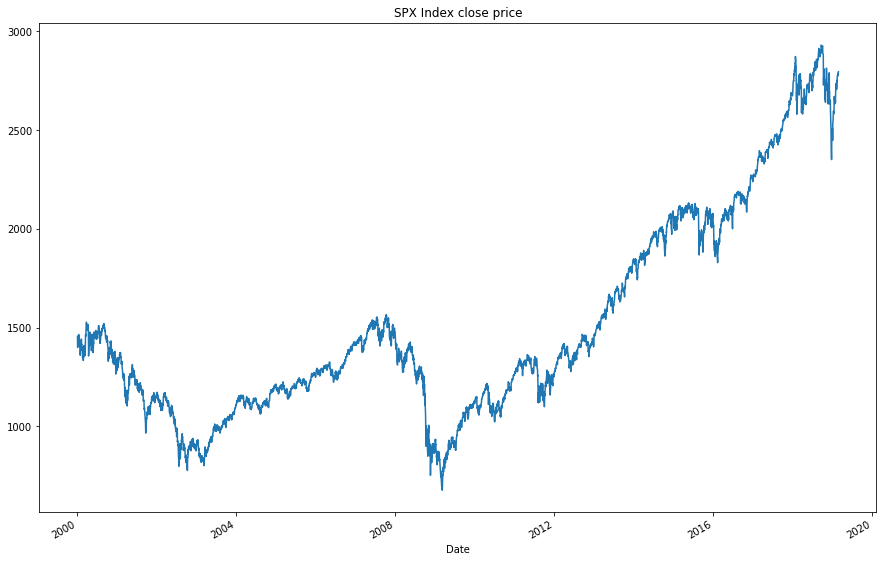

In [40]:
df_spx_close.plot(title='SPX Index close price',figsize=(15,10))

In [17]:
df_bcom_raw2 = pd.read_excel('BCOM Index (OHLC).xlsx', skiprows=[0,1,2,3,4,5], parse_dates=['Date'], index_col=0)
df_bcom_raw2.tail()

,PX_LAST,Change,% Change,PX_OPEN,Change.1,% Change.1,PX_HIGH,Change.2,% Change.2,PX_LOW,Change.3,% Change.3
Date,,,,,,,,,,,,
2000-01-07,90.7495,NaN,NaN,90.7495,NaN,NaN,90.7495,NaN,NaN,90.7495,NaN,NaN
2000-01-06,91.0400,NaN,NaN,91.0400,NaN,NaN,91.0400,NaN,NaN,91.0400,NaN,NaN
2000-01-05,91.0023,NaN,NaN,91.0023,NaN,NaN,91.0023,NaN,NaN,91.0023,NaN,NaN
2000-01-04,91.4952,NaN,NaN,91.4952,NaN,NaN,91.4952,NaN,NaN,91.4952,NaN,NaN
2000-01-03,92.0451,NaN,NaN,92.0451,NaN,NaN,92.0451,NaN,NaN,92.0451,NaN,NaN


In [18]:
df_spx_raw2 = pd.read_excel('SPX Index (OHLC).xlsx', skiprows=[0,1,2,3,4,5], parse_dates=['Date'], index_col=0)
len(df_spx_raw2)
df_spx_raw2.tail()

,PX_LAST,Change,% Change,PX_OPEN,Change.1,% Change.1,PX_HIGH,Change.2,% Change.2,PX_LOW,Change.3,% Change.3
Date,,,,,,,,,,,,
2000-01-07,1441.47,NaN,NaN,1403.45,NaN,NaN,1441.47,NaN,NaN,1400.73,NaN,NaN
2000-01-06,1403.45,NaN,NaN,1402.11,NaN,NaN,1411.90,NaN,NaN,1392.02,NaN,NaN
2000-01-05,1402.11,NaN,NaN,1399.42,NaN,NaN,1413.27,NaN,NaN,1377.68,NaN,NaN
2000-01-04,1399.42,NaN,NaN,1455.22,NaN,NaN,1455.22,NaN,NaN,1397.43,NaN,NaN
2000-01-03,1455.22,NaN,NaN,1469.25,NaN,NaN,1478.00,NaN,NaN,1438.36,NaN,NaN


In [41]:
# 转换成percent change

df_bcom_close_pct = df_bcom_close.pct_change()
# df_bcom_close_pct.dropna(inplace=True)
df_spx_close_pct = df_spx_close.pct_change()
# df_spx_close_pct.dropna(inplace=True)
rtn_df = pd.DataFrame({'spx_rtn':df_spx_close_pct , 'bcom_rtn':df_bcom_close_pct})
rtn_df.dropna(inplace=True)

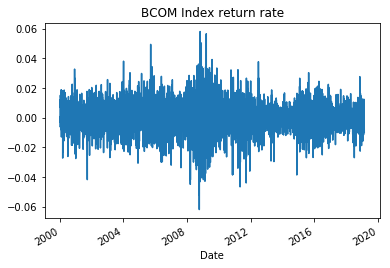

In [49]:
df_bcom_close.pct_change().plot(title='BCOM Index return rate')

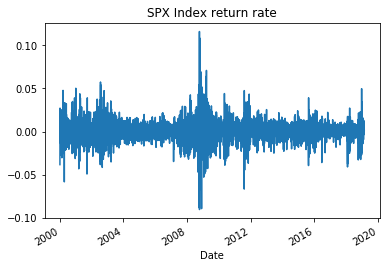

In [50]:
df_spx_close.pct_change().plot(title='SPX Index return rate')

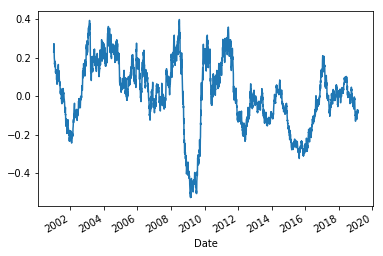

In [47]:
df_bcom_close.pct_change(periods=252).plot()

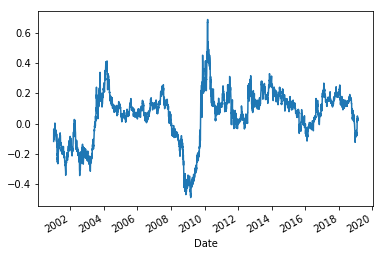

In [48]:
df_spx_close.pct_change(periods=252).plot()

Text(0, 0.5, 'SPX Index return rate')

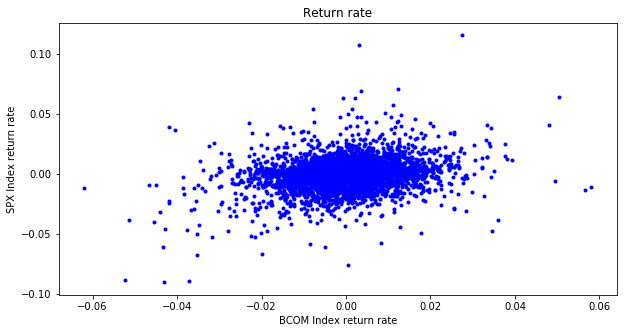

In [59]:
fig = plt.figure(figsize=(10,5))
plot(rtn_df.bcom_rtn, rtn_df.spx_rtn, 'b.')
plt.title('Return rate')
plt.xlabel("BCOM Index return rate")
plt.ylabel("SPX Index return rate")

In [21]:
rtn_df[:].corr()

,spx_rtn,bcom_rtn
spx_rtn,1.000000,0.245507
bcom_rtn,0.245507,1.000000


In [90]:
res = rtn_df[:].corr()

In [91]:
res.iloc[0,1]

0.24550713298477167

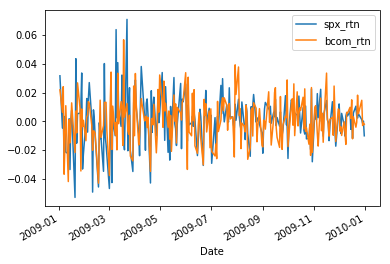

In [92]:
rtn_df['2009'].plot()

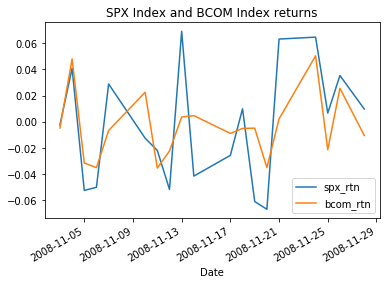

In [93]:

rtn_df['2008-11'].plot(title='SPX Index and BCOM Index returns')


重要代码

No handles with labels found to put in legend.


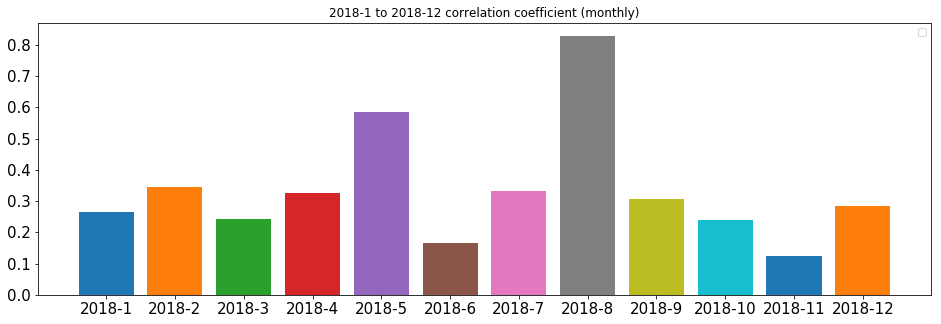

In [110]:
date = '2018-1'

fig = plt.figure(figsize=(16,5))
plt.title('2018-1 to 2018-12 correlation coefficient (monthly)')
plt.tick_params(labelsize=15)

plt.legend()
while date!= '2019-1':
#     print(date,rtn_df[date].corr().iloc[0,1])
    plt.bar(date,rtn_df[date].corr().iloc[0,1])
    y,m = date.split('-')
    if int(m) < 12:
        m = str(int(m) +1)
        date = y+'-'+m
    else:
        y = str(int(y) +1)
        m = '1'
        date = y+'-'+m


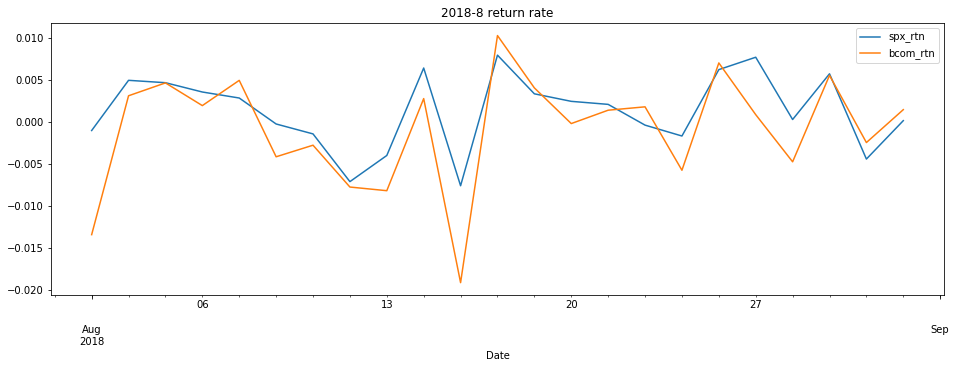

In [111]:
rtn_df['2018-8'].plot(title='2018-8 return rate',figsize=(16,5))

2000 -0.06291254917674717 

2001 -0.0023306539312200254 

2002 0.2135757838053453 

2003 -0.16158984636246443 

2004 0.013274896929941266 

2005 -0.006186876439006421 

2006 0.09057764081070856 

2007 0.17399394062937773 

2008 0.2532077448354718 

2009 0.5550163271365216 

2010 0.5502349085684368 

2011 0.4612605787861436 

2012 0.46839886518602913 

2013 0.25639977672476766 

2014 0.05238299957399896 

2015 0.2927246870120817 

2016 0.40097698502290835 

2017 0.04061009712917502 

2018 0.2708782246555144 

2019 0.505989234555171 



Text(0.5, 1.0, 'correlation coefficient between BCOM Index and SPX Index')

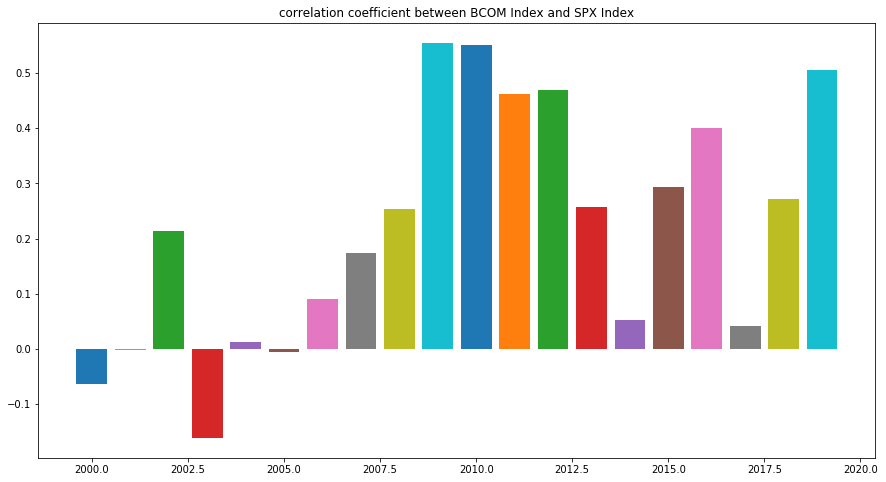

In [16]:
fig = plt.figure(figsize=(15,8))

for i in range(2000,2020):
    print(i, rtn_df[str(i)].corr().iloc[0,1],'\n')
    plt.bar(i,rtn_df[str(i)].corr().iloc[0,1])
    
# plt.xticks(range(2000,2020))
plt.title('correlation coefficient between BCOM Index and SPX Index')

In [212]:
rtn_df['2019'].cov()

,spx_rtn,bcom_rtn
spx_rtn,0.000089,0.000033
bcom_rtn,0.000033,0.000046


In [255]:
rtn_df['2008-11'].corr()

,spx_rtn,bcom_rtn
spx_rtn,1.000000,0.659766
bcom_rtn,0.659766,1.000000


如果只想移动df中的某一列数据，则需要这样操作： df['DD']= df['DD'].shift(1)

In [81]:
# 这里把bcom移动一行

edited_rtn_df = pd.DataFrame(rtn_df)
edited_rtn_df['bcom_rtn'] = edited_rtn_df['bcom_rtn'].shift(1)
edited_rtn_df.head()

,spx_rtn,bcom_rtn
Date,,
2000-01-04,-0.038345,NaN
2000-01-05,0.001922,-0.005974
2000-01-06,0.000956,-0.005387
2000-01-07,0.027090,0.000414
2000-01-10,0.011190,-0.003191


In [82]:
rtn_df.corr()

,spx_rtn,bcom_rtn
spx_rtn,1.000000,-0.048776
bcom_rtn,-0.048776,1.000000


In [205]:
len(rtn_df)

4801

In [206]:
rtn_df[2000:3000].corr()

,spx_rtn,bcom_rtn
spx_rtn,1.00000,-0.40868
bcom_rtn,-0.40868,1.00000


In [184]:
rtn_df[2000:3000]

,spx_rtn,bcom_rtn
spx_rtn,1.000000,-0.339907
bcom_rtn,-0.339907,1.000000


In [105]:
rtn_df.corr()

,spx_rtn,bcom_rtn
spx_rtn,1.000000,-0.048776
bcom_rtn,-0.048776,1.000000
